
# Voxel-Based Morphometry on Oasis dataset with Space-Net prior

Predicting age from gray-matter concentration maps from OASIS
dataset. Note that age is a continuous variable, we use the regressor
here, and not the classification object.

See also the documentation: `space_net`.


## Load the Oasis VBM dataset



In [1]:
import numpy as np

from nilearn import datasets

n_subjects = 200  # increase this number if you have more RAM on your box
dataset_files = datasets.fetch_oasis_vbm(
    n_subjects=n_subjects, legacy_format=False
)
age = dataset_files.ext_vars["age"].astype(float)
age = np.array(age)
gm_imgs = np.array(dataset_files.gray_matter_maps)


# Split data into training set and test set
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

rng = check_random_state(42)
gm_imgs_train, gm_imgs_test, age_train, age_test = train_test_split(
    gm_imgs, age, train_size=0.6, random_state=rng
)

# Sort test data for better visualization (trend, etc.)
perm = np.argsort(age_test)[::-1]
age_test = age_test[perm]
gm_imgs_test = gm_imgs_test[perm]


Dataset created in /Users/lcq/nilearn_data/oasis1



Downloaded 892059648 of 905208634 bytes (98.5%,    0.9s remaining) ...done. (63 seconds, 1 min)
Extracting data from /Users/lcq/nilearn_data/oasis1/ca50951394ea282f76278201a3c0415c/archive_dartel.tgz..... done.


## Fit the SpaceNet and predict with it
To save time (because these are anat images with many voxels), we include
only the 5-percent voxels most correlated with the age variable to fit.
Also, we set memory_level=2 so that more of the intermediate computations
are cached. We used a graph-net penalty here but more beautiful results can
be obtained using the TV-l1 penalty, at the expense of longer runtimes.
Also, you may pass and n_jobs=<some_high_value> to the
SpaceNetRegressor class, to take advantage of a multi-core system.




In [2]:
from nilearn.decoding import SpaceNetRegressor

decoder = SpaceNetRegressor(
    memory="nilearn_cache",
    penalty="graph-net",
    screening_percentile=5.0,
    memory_level=2,
    standardize="zscore_sample",
)
decoder.fit(gm_imgs_train, age_train)  # fit
coef_img = decoder.coef_img_
y_pred = decoder.predict(gm_imgs_test).ravel()  # predict
mse = np.mean(np.abs(age_test - y_pred))
print(f"Mean square error (MSE) on the predicted age: {mse:.2f}")

[NiftiMasker.fit] Loading data from [/Users/lcq/nilearn_data/oasis1/OAS1_0003_MR1/mwrc1OAS1_0003_MR1_mpr_anon_fslswapdim_bet.nii.gz,
 /Users/lcq/nilearn_data/oasis1/OAS1_0086_MR1/mwrc1OAS1_0086_MR1_mpr_anon_fslswapdim_bet.nii.gz,
 /Users/lcq/nilearn_data/oasis1/OAS1_0052_MR1/mwrc1OAS1_0052_MR1_mpr_anon_fslswapdim_bet.nii.gz,
 /Users/lcq/nilearn_data/oasis1/OAS1_0211_MR1/mwrc1OAS1_0211_MR1_mpr_anon_fslswapdim_bet.nii.gz,
 /Users/lcq/nilearn_data/oasis1/OAS1_0216_MR1/mwrc1OAS1_0216_MR1_mpr_anon_fslswapdim_bet.nii.gz,
 /Users/lcq/nilearn_data/oasis1/OAS1_0096_MR1/mwrc1OAS1_0096_MR1_mpr_anon_fslswapdim_bet.nii.gz,
 /Users/lcq/nilearn_data/oasis1/OAS1_0182_MR1/mwrc1OAS1_0182_MR1_mpr_anon_fslswapdim_bet.nii.gz,
 /Users/lcq/nilearn_data/oasis1/OAS1_0041_MR1/mwrc1OAS1_0041_MR1_mpr_anon_fslswapdim_bet.nii.gz,
 /Users/lcq/nilearn_data/oasis1/OAS1_0214_MR1/mwrc1OAS1_0214_MR1_mpr_anon_fslswapdim_bet.nii.gz,
 /Users/lcq/nilearn_data/oasis1/OAS1_0069_MR1/mwrc1OAS1_0069_MR1_mpr_anon_fslswapdim_bet.ni

/opt/homebrew/Caskroom/miniconda/base/envs/mooney/lib/python3.9/site-packages/nilearn/decoding/space_net.py:941: UserWarning: Brain mask is bigger than the volume of a standard human brain. This object is probably not tuned to be used on such data.
  self.screening_percentile_ = _adjust_screening_percentile(


________________________________________________________________________________
[Memory] Calling nilearn.decoding.space_net.path_scores...
path_scores(<function _graph_net_squared_loss at 0x17546dd30>, array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), array([73., ..., 62.]), array([[[ True, ...,  True],
        ...,
        [ True, ...,  True]],

       ...,

       [[ True, ...,  True],
        ...,
        [ True, ...,  True]]]), 
None, [0.5], array([ 15, ..., 119]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), {'max_iter': 200, 'tol': 0.0001}, n_alphas=10, eps=0.001, is_classif=False, key=(0, 0), debias=False, verbose=1, screening_percentile=1.2652228933482088)


........./opt/homebrew/Caskroom/miniconda/base/envs/mooney/lib/python3.9/site-packages/joblib/parallel.py:1792: UserWarning: Persisting input arguments took 1.57s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably some large input arguments for a wrapped function.
  res = func(*args, **kwargs)


_____________________________________________________path_scores - 16.4s, 0.3min
________________________________________________________________________________
[Memory] Calling nilearn.decoding.space_net.path_scores...
path_scores(<function _graph_net_squared_loss at 0x17546dd30>, array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), array([73., ..., 62.]), array([[[ True, ...,  True],
        ...,
        [ True, ...,  True]],

       ...,

       [[ True, ...,  True],
        ...,
        [ True, ...,  True]]]), 
None, [0.5], array([  0, ..., 119]), array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), {'max_iter': 200, 'tol': 0.0001}, n_alphas=10, eps=0.001, is_classif=False, key=(0, 1), debias=False, verbose=1, screening_percentile=1.2652228933482088)


........./opt/homebrew/Caskroom/miniconda/base/envs/mooney/lib/python3.9/site-packages/joblib/parallel.py:1792: UserWarning: Persisting input arguments took 1.55s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably some large input arguments for a wrapped function.
  res = func(*args, **kwargs)


_____________________________________________________path_scores - 17.6s, 0.3min
________________________________________________________________________________
[Memory] Calling nilearn.decoding.space_net.path_scores...
path_scores(<function _graph_net_squared_loss at 0x17546dd30>, array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), array([73., ..., 62.]), array([[[ True, ...,  True],
        ...,
        [ True, ...,  True]],

       ...,

       [[ True, ...,  True],
        ...,
        [ True, ...,  True]]]), 
None, [0.5], array([  0, ..., 119]), array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]), {'max_iter': 200, 'tol': 0.0001}, n_alphas=10, eps=0.001, is_classif=False, key=(0, 2), debias=False, verbose=1, screening_percentile=1.2652228933482088)


........./opt/homebrew/Caskroom/miniconda/base/envs/mooney/lib/python3.9/site-packages/joblib/parallel.py:1792: UserWarning: Persisting input arguments took 1.58s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably some large input arguments for a wrapped function.
  res = func(*args, **kwargs)


_____________________________________________________path_scores - 15.8s, 0.3min
________________________________________________________________________________
[Memory] Calling nilearn.decoding.space_net.path_scores...
path_scores(<function _graph_net_squared_loss at 0x17546dd30>, array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), array([73., ..., 62.]), array([[[ True, ...,  True],
        ...,
        [ True, ...,  True]],

       ...,

       [[ True, ...,  True],
        ...,
        [ True, ...,  True]]]), 
None, [0.5], array([  0, ..., 119]), array([45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]), {'max_iter': 200, 'tol': 0.0001}, n_alphas=10, eps=0.001, is_classif=False, key=(0, 3), debias=False, verbose=1, screening_percentile=1.2652228933482088)


........./opt/homebrew/Caskroom/miniconda/base/envs/mooney/lib/python3.9/site-packages/joblib/parallel.py:1792: UserWarning: Persisting input arguments took 1.57s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably some large input arguments for a wrapped function.
  res = func(*args, **kwargs)


_____________________________________________________path_scores - 18.3s, 0.3min
________________________________________________________________________________
[Memory] Calling nilearn.decoding.space_net.path_scores...
path_scores(<function _graph_net_squared_loss at 0x17546dd30>, array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), array([73., ..., 62.]), array([[[ True, ...,  True],
        ...,
        [ True, ...,  True]],

       ...,

       [[ True, ...,  True],
        ...,
        [ True, ...,  True]]]), 
None, [0.5], array([  0, ..., 119]), array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74]), {'max_iter': 200, 'tol': 0.0001}, n_alphas=10, eps=0.001, is_classif=False, key=(0, 4), debias=False, verbose=1, screening_percentile=1.2652228933482088)


........./opt/homebrew/Caskroom/miniconda/base/envs/mooney/lib/python3.9/site-packages/joblib/parallel.py:1792: UserWarning: Persisting input arguments took 1.62s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably some large input arguments for a wrapped function.
  res = func(*args, **kwargs)


_____________________________________________________path_scores - 16.9s, 0.3min
________________________________________________________________________________
[Memory] Calling nilearn.decoding.space_net.path_scores...
path_scores(<function _graph_net_squared_loss at 0x17546dd30>, array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), array([73., ..., 62.]), array([[[ True, ...,  True],
        ...,
        [ True, ...,  True]],

       ...,

       [[ True, ...,  True],
        ...,
        [ True, ...,  True]]]), 
None, [0.5], array([  0, ..., 119]), array([75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]), {'max_iter': 200, 'tol': 0.0001}, n_alphas=10, eps=0.001, is_classif=False, key=(0, 5), debias=False, verbose=1, screening_percentile=1.2652228933482088)


........./opt/homebrew/Caskroom/miniconda/base/envs/mooney/lib/python3.9/site-packages/joblib/parallel.py:1792: UserWarning: Persisting input arguments took 1.57s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably some large input arguments for a wrapped function.
  res = func(*args, **kwargs)


_____________________________________________________path_scores - 15.7s, 0.3min
________________________________________________________________________________
[Memory] Calling nilearn.decoding.space_net.path_scores...
path_scores(<function _graph_net_squared_loss at 0x17546dd30>, array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), array([73., ..., 62.]), array([[[ True, ...,  True],
        ...,
        [ True, ...,  True]],

       ...,

       [[ True, ...,  True],
        ...,
        [ True, ...,  True]]]), 
None, [0.5], array([  0, ..., 119]), array([ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104]), 
{'max_iter': 200, 'tol': 0.0001}, n_alphas=10, eps=0.001, is_classif=False, key=(0, 6), debias=False, verbose=1, screening_percentile=1.2652228933482088)


........./opt/homebrew/Caskroom/miniconda/base/envs/mooney/lib/python3.9/site-packages/joblib/parallel.py:1792: UserWarning: Persisting input arguments took 1.55s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably some large input arguments for a wrapped function.
  res = func(*args, **kwargs)


_____________________________________________________path_scores - 16.1s, 0.3min
________________________________________________________________________________
[Memory] Calling nilearn.decoding.space_net.path_scores...
path_scores(<function _graph_net_squared_loss at 0x17546dd30>, array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), array([73., ..., 62.]), array([[[ True, ...,  True],
        ...,
        [ True, ...,  True]],

       ...,

       [[ True, ...,  True],
        ...,
        [ True, ...,  True]]]), 
None, [0.5], array([  0, ..., 104]), array([105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119]), 
{'max_iter': 200, 'tol': 0.0001}, n_alphas=10, eps=0.001, is_classif=False, key=(0, 7), debias=False, verbose=1, screening_percentile=1.2652228933482088)


........./opt/homebrew/Caskroom/miniconda/base/envs/mooney/lib/python3.9/site-packages/joblib/parallel.py:1792: UserWarning: Persisting input arguments took 1.56s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably some large input arguments for a wrapped function.
  res = func(*args, **kwargs)


_____________________________________________________path_scores - 17.7s, 0.3min
Time Elapsed: 167.80726289749146 seconds, 2.796787714958191 minutes.
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(91, 109, 91, 80),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
Mean square error (MSE) on the predicted age: 12.33


## Visualize the decoding maps and quality of predictions
Visualize the resulting maps



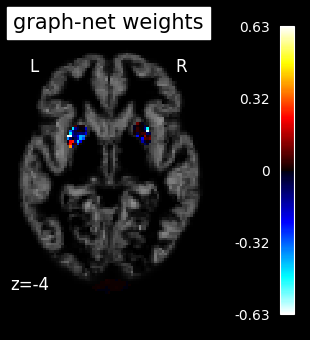

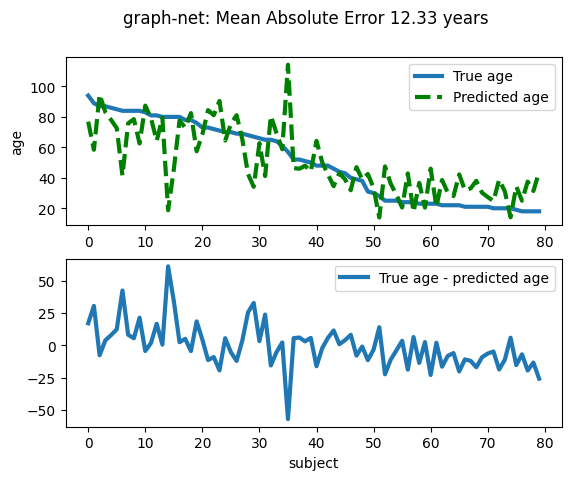

In [4]:
from nilearn.plotting import plot_stat_map, show

# weights map
background_img = gm_imgs[0]
plot_stat_map(
    coef_img,
    background_img,
    title="graph-net weights",
    display_mode="z",
    cut_coords=1,
)

# Plot the prediction errors.
import matplotlib.pyplot as plt

plt.figure()
plt.suptitle(f"graph-net: Mean Absolute Error {mse:.2f} years")
linewidth = 3
ax1 = plt.subplot(211)
ax1.plot(age_test, label="True age", linewidth=linewidth)
ax1.plot(y_pred, "--", c="g", label="Predicted age", linewidth=linewidth)
ax1.set_ylabel("age")
plt.legend(loc="best")
ax2 = plt.subplot(212)
ax2.plot(
    age_test - y_pred, label="True age - predicted age", linewidth=linewidth
)
ax2.set_xlabel("subject")
plt.legend(loc="best")

show()